In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\winemag-data_first150k.csv')

In [3]:
tfidf = TfidfVectorizer(
min_df = 5,
max_df = 0.95,
max_features = 8000,
stop_words = 'english'
)
tfidf.fit(df.description)
text = tfidf.transform(df.description)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


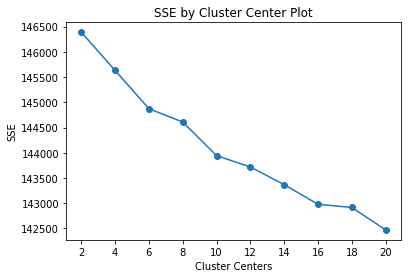

In [4]:
def find_optimal_clusters(df, max_k):
    iters = range(2, max_k+1, 2)
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(df).inertia_)
        print('Fit {} clusters'.format(k))
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
find_optimal_clusters(text, 20)

In [5]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

In [12]:
def get_top_keywords(df, clusters, labels, n_terms):
    df1 = pd.DataFrame(df.todense()).groupby(clusters).mean()
    #for i,r in df.iterrows():
        #print('\nCluster {}'.format(i))
        
        #print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)

In [9]:
tfidf.get_feature_names()

['000',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '100',
 '11',
 '12',
 '125',
 '13',
 '130',
 '14',
 '15',
 '150',
 '16',
 '17',
 '18',
 '18th',
 '19',
 '1970s',
 '1972',
 '1973',
 '1980s',
 '1990s',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '19th',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2005s',
 '2006',
 '2007',
 '2007s',
 '2008',
 '2008s',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024',
 '2025',
 '2026',
 '2027',
 '2028',
 '2029',
 '2030',
 '2032',
 '2035',
 '2040',
 '21',
 '22',
 '23',
 '24',
 '25',
 '250',
 '26',
 '27',
 '28',
 '29',
 '30',
 '300',
 '31',
 '32',
 '33',
 '34',
 '35',
 '350',
 '36',
 '37',
 '38',
 '39',
 '40',
 '400',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '500',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '600',
 '61',
 '62',
 '63',
 '64',
 '65',
 '

# TF -IDF on small data

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer

dataset = [
    "I enjoy reading about Machine Learning and Machine Learning is my PhD subject",
    "I would enjoy a walk in the park",
    "I was reading in the library"
]

In [11]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(dataset)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

            TF-IDF
machine   0.513720
learning  0.513720
about     0.256860
subject   0.256860
phd       0.256860
and       0.256860
my        0.256860
is        0.256860
reading   0.195349
enjoy     0.195349
library   0.000000
park      0.000000
in        0.000000
the       0.000000
walk      0.000000
was       0.000000
would     0.000000


# EXPLAINATION:-


In [13]:
documentA = 'the man went out for a walk'
documentB = 'the children sat around the fire'

In [14]:
bagOfWordsA = documentA.split(' ')
bagOfWordsB = documentB.split(' ')

In [15]:
uniqueWords = set(bagOfWordsA).union(set(bagOfWordsB))

In [16]:
numOfWordsA = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsA:
    numOfWordsA[word] += 1
numOfWordsB = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsB:
    numOfWordsB[word] += 1

In [17]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
#calculate TF
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

In [19]:
tfA = computeTF(numOfWordsA, bagOfWordsA)
tfB = computeTF(numOfWordsB, bagOfWordsB)

In [20]:
print(tfA)

{'went': 0.14285714285714285, 'out': 0.14285714285714285, 'fire': 0.0, 'around': 0.0, 'children': 0.0, 'for': 0.14285714285714285, 'the': 0.14285714285714285, 'a': 0.14285714285714285, 'man': 0.14285714285714285, 'walk': 0.14285714285714285, 'sat': 0.0}


In [21]:
print(tfB)

{'went': 0.0, 'out': 0.0, 'fire': 0.16666666666666666, 'around': 0.16666666666666666, 'children': 0.16666666666666666, 'for': 0.0, 'the': 0.3333333333333333, 'a': 0.0, 'man': 0.0, 'walk': 0.0, 'sat': 0.16666666666666666}


In [22]:
#calculate IDF

def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

In [23]:
idfs = computeIDF([numOfWordsA, numOfWordsB])

In [24]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [25]:
tfidfA = computeTFIDF(tfA, idfs)
tfidfB = computeTFIDF(tfB, idfs)
df = pd.DataFrame([tfidfA, tfidfB])

In [26]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([documentA, documentB])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [28]:
print(tfidfA)

{'went': 0.09902102579427789, 'out': 0.09902102579427789, 'fire': 0.0, 'around': 0.0, 'children': 0.0, 'for': 0.09902102579427789, 'the': 0.0, 'a': 0.09902102579427789, 'man': 0.09902102579427789, 'walk': 0.09902102579427789, 'sat': 0.0}


In [30]:
print(tfidfB)

{'went': 0.0, 'out': 0.0, 'fire': 0.11552453009332421, 'around': 0.11552453009332421, 'children': 0.11552453009332421, 'for': 0.0, 'the': 0.0, 'a': 0.0, 'man': 0.0, 'walk': 0.0, 'sat': 0.11552453009332421}


In [31]:
df

,around,children,fire,for,man,out,sat,the,walk,went
0,0.000000,0.000000,0.000000,0.42616,0.42616,0.42616,0.000000,0.303216,0.42616,0.42616
1,0.407401,0.407401,0.407401,0.00000,0.00000,0.00000,0.407401,0.579739,0.00000,0.00000


# Thank you